In [1]:
# Import dependencies
from bs4 import BeautifulSoup as bs
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Setup Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# URL of page to be scraped
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

[WDM] - Downloading: 100%|██████████████████| 8.15M/8.15M [00:28<00:00, 299kB/s]


In [3]:
# Confirm the HTML element to isolate the table info is present within the browser
browser.is_element_present_by_css("tr.data-row", 1)

True

In [4]:
# Create variables for browser.html to use as a Beautiful Soup object and parse out the webpage
weather = browser.html
weather_soup = bs(weather, "html.parser")

In [5]:
# Use the soup object to find the results for the HTML element
weather_results = weather_soup.find_all("tr", class_="data-row")

In [6]:
# Create an empty list to store the rows from the table
weather_row_list = []

In [7]:
# Create a for loop that finds and extracts each piece of data from the table
for result in weather_results:
    mars_id = result.find_all("td")[0].text
    terr_date = result.find_all("td")[1].text
    sol = result.find_all("td")[2].text
    ls = result.find_all("td")[3].text
    month = result.find_all("td")[4].text
    min_temp = result.find_all("td")[5].text
    pressure = result.find_all("td")[6].text

# Store the data into a list, converting each item as it's stored to the appropriate data type
    weather_row = [int(mars_id), terr_date, int(sol), int(ls), int(month), float(min_temp), float(pressure)]

# Append the list to the empty list created in the step above
    weather_row_list.append(weather_row)
    
# Print each row as it's created
    print(weather_row)

[2, '2012-08-16', 10, 155, 6, -75.0, 739.0]
[13, '2012-08-17', 11, 156, 6, -76.0, 740.0]
[24, '2012-08-18', 12, 156, 6, -76.0, 741.0]
[35, '2012-08-19', 13, 157, 6, -74.0, 732.0]
[46, '2012-08-20', 14, 157, 6, -74.0, 740.0]
[57, '2012-08-21', 15, 158, 6, -78.0, 740.0]
[68, '2012-08-22', 16, 158, 6, -77.0, 740.0]
[79, '2012-08-23', 17, 159, 6, -76.0, 742.0]
[112, '2012-08-27', 21, 161, 6, -74.0, 741.0]
[114, '2012-08-28', 22, 162, 6, -74.0, 742.0]
[123, '2012-08-29', 23, 162, 6, -75.0, 741.0]
[134, '2012-08-30', 24, 163, 6, -75.0, 742.0]
[145, '2012-08-31', 25, 163, 6, -75.0, 743.0]
[156, '2012-09-01', 26, 164, 6, -76.0, 745.0]
[163, '2012-09-02', 27, 164, 6, -75.0, 743.0]
[170, '2012-09-03', 28, 165, 6, -75.0, 745.0]
[171, '2012-09-04', 29, 166, 6, -75.0, 747.0]
[172, '2012-09-05', 30, 166, 6, -74.0, 747.0]
[173, '2012-09-06', 31, 167, 6, -74.0, 745.0]
[175, '2012-09-08', 33, 168, 6, -73.0, 748.0]
[176, '2012-09-10', 34, 168, 6, -73.0, 748.0]
[177, '2012-09-11', 35, 169, 6, -73.0, 749.

[1261, '2016-05-07', 1334, 148, 5, -77.0, 732.0]
[1264, '2016-05-08', 1335, 149, 5, -77.0, 732.0]
[1265, '2016-05-09', 1336, 149, 5, -75.0, 732.0]
[1266, '2016-05-10', 1337, 150, 6, -76.0, 734.0]
[1267, '2016-05-11', 1338, 150, 6, -75.0, 734.0]
[1268, '2016-05-12', 1339, 151, 6, -77.0, 733.0]
[1269, '2016-05-13', 1340, 151, 6, -76.0, 734.0]
[1270, '2016-05-14', 1341, 152, 6, -76.0, 735.0]
[1271, '2016-05-15', 1342, 152, 6, -80.0, 735.0]
[1272, '2016-05-17', 1343, 153, 6, -74.0, 735.0]
[1273, '2016-05-18', 1344, 153, 6, -75.0, 734.0]
[1276, '2016-05-19', 1345, 154, 6, -75.0, 735.0]
[1274, '2016-05-20', 1346, 155, 6, -75.0, 737.0]
[1277, '2016-05-21', 1347, 155, 6, -75.0, 736.0]
[1275, '2016-05-22', 1348, 156, 6, -76.0, 735.0]
[1278, '2016-05-23', 1349, 156, 6, -73.0, 737.0]
[1279, '2016-05-24', 1350, 157, 6, -73.0, 738.0]
[1280, '2016-05-25', 1351, 157, 6, -72.0, 739.0]
[1283, '2016-05-26', 1352, 158, 6, -73.0, 736.0]
[1281, '2016-05-27', 1353, 158, 6, -76.0, 737.0]
[1282, '2016-05-28',

In [8]:
# Quit the browser session.
browser.quit()

In [9]:
# Confirm rows were added to empty list
weather_row_list

[[2, '2012-08-16', 10, 155, 6, -75.0, 739.0],
 [13, '2012-08-17', 11, 156, 6, -76.0, 740.0],
 [24, '2012-08-18', 12, 156, 6, -76.0, 741.0],
 [35, '2012-08-19', 13, 157, 6, -74.0, 732.0],
 [46, '2012-08-20', 14, 157, 6, -74.0, 740.0],
 [57, '2012-08-21', 15, 158, 6, -78.0, 740.0],
 [68, '2012-08-22', 16, 158, 6, -77.0, 740.0],
 [79, '2012-08-23', 17, 159, 6, -76.0, 742.0],
 [112, '2012-08-27', 21, 161, 6, -74.0, 741.0],
 [114, '2012-08-28', 22, 162, 6, -74.0, 742.0],
 [123, '2012-08-29', 23, 162, 6, -75.0, 741.0],
 [134, '2012-08-30', 24, 163, 6, -75.0, 742.0],
 [145, '2012-08-31', 25, 163, 6, -75.0, 743.0],
 [156, '2012-09-01', 26, 164, 6, -76.0, 745.0],
 [163, '2012-09-02', 27, 164, 6, -75.0, 743.0],
 [170, '2012-09-03', 28, 165, 6, -75.0, 745.0],
 [171, '2012-09-04', 29, 166, 6, -75.0, 747.0],
 [172, '2012-09-05', 30, 166, 6, -74.0, 747.0],
 [173, '2012-09-06', 31, 167, 6, -74.0, 745.0],
 [175, '2012-09-08', 33, 168, 6, -73.0, 748.0],
 [176, '2012-09-10', 34, 168, 6, -73.0, 748.0],
 

In [10]:
# Crate a DataFrame using the list created above and include the headings from the original dataset
weather_df = pd.DataFrame(data = weather_row_list, columns = ["trans_id", "terrestrial_date", \
                                                              "sol", "ls", "month", "min_temp", "pressure"])
weather_df.head()

trans_id terrestrial_date  sol   ls  month  min_temp  pressure
0         2       2012-08-16   10  155      6     -75.0     739.0
1        13       2012-08-17   11  156      6     -76.0     740.0
2        24       2012-08-18   12  156      6     -76.0     741.0
3        35       2012-08-19   13  157      6     -74.0     732.0
4        46       2012-08-20   14  157      6     -74.0     740.0

In [11]:
# Confirm the data types of all the columns
weather_df.dtypes

trans_id              int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [12]:
# Update the terrestrial_date type to datetime
weather_df["terrestrial_date"] = pd.to_datetime(weather_df["terrestrial_date"], format="%Y-%m-%d")
weather_df.dtypes

trans_id                     int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [13]:
# Export the DataFrame to a CSV file
os.makedirs("output", exist_ok=True)
weather_df.to_csv("output/mars_temp.csv", index=False)

### Q: How many months exist on Mars?

##### A: 12 months

In [14]:
# Find the unique months and count the number of values using len
len(weather_df["month"].unique())

12

In [15]:
# Use a groupby month to visualize how many transmissions were recorded by month over time
grouped_df = weather_df.groupby(["month"])

In [16]:
num_months = grouped_df.count()
num_months = num_months[["trans_id"]].rename(columns={"trans_id":"transmissions"})
num_months

transmissions
month               
1                174
2                178
3                192
4                194
5                149
6                147
7                142
8                141
9                134
10               112
11               138
12               166

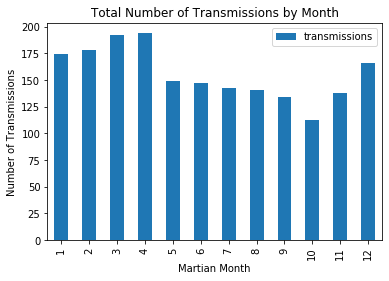

In [17]:
# Plot the number of transmissions by month
num_months.plot(kind="bar", title="Total Number of Transmissions by Month")
plt.ylabel("Number of Transmissions")
plt.xlabel("Martian Month")
plt.savefig("output/martian_month.png")
plt.show()

### How many Martian (and not Earth) days worth of data exist in the scraped dataset?

##### A: 1,867 individual days

In [18]:
# Find the unique days and count the number of values using len
len(weather_df["sol"].unique())

1867

### What are the coldest and the warmest months on Mars (at the location of Curiosity)?
#### Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

##### A: Coldest Month - 3rd month; Warmest Month - 8th month

In [19]:
#weather_df

In [20]:
# Use the groupby month created previously and take the average of the min_temp
avg_temps = grouped_df["min_temp"].mean()

# Sort the values to determine the avg min and avg max
avg_temps.sort_values()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

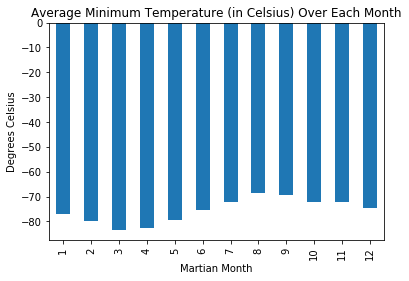

In [21]:
# Plot the avgs in a bar chart
avg_temps.plot(kind="bar", title="Average Minimum Temperature (in Celsius) Over Each Month")
plt.ylabel("Degrees Celsius")
plt.xlabel("Martian Month")
plt.savefig("output/min-temp.png")
plt.show()

### Which months have the lowest and the highest atmospheric pressure on Mars?
#### Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

##### A: Lowest Atmospheric Pressure - 6th month; Highest Atmospheric Pressure - 9th month

In [22]:
# Use the groupby month created previously and take the average of the pressure
avg_pressure = grouped_df["pressure"].mean()

# Sort values to determine the lowest and highest avgs
avg_pressure.sort_values()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

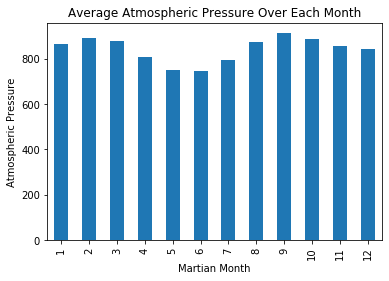

In [23]:
# Plot the avgs in a bar chart
avg_pressure.plot(kind="bar", title="Average Atmospheric Pressure Over Each Month")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Martian Month")
plt.savefig("output/pressure.png")
plt.show()

### About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#### Visually estimate the result by plotting the daily minimum temperature.

##### A: Approx. 675 Earth days are in one Martian year

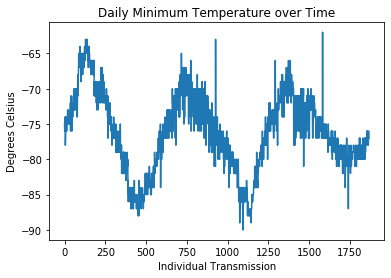

In [24]:
# Plot the min_temp values in a line graph to show the weather pattern, assuming it's similar to Earth
# review the curves and count the number of transmissions between the peaks of either two highs or two lows
weather_df["min_temp"].plot(title="Daily Minimum Temperature over Time")
plt.xlabel("Individual Transmission")
plt.ylabel("Degrees Celsius")
plt.savefig("output/martian_year.png")
plt.show()

In [25]:
# One low is around 450 and another is around 1125, subtract 450 from 1125 to estimate number of days in a 
# Martian year
1125-450

675